Data Source: https://gist.github.com/quant5/af2adf32bd4c5141e3b14b607771217a

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
d1 = pd.read_csv('abc_sales.csv')
d1['sales'] = pd.to_numeric(d1['sales'], errors='coerce')
d1.dropna(inplace=True) 
d1

,date,sales
0,2018-02-04,927344.59
1,2018-02-05,963091.64
2,2018-02-06,862046.64
3,2018-02-07,772632.77
4,2018-02-08,1011371.25
...,...,...
2182,2024-01-26,736678.70
2183,2024-01-27,713985.39
2184,2024-01-28,638627.04
2185,2024-01-29,696591.99


In [46]:
d2 = pd.read_csv('abc_calendar.csv')
d2

,period,end_date
0,1QFY-2015,2014-05-03
1,2QFY-2015,2014-08-02
2,3QFY-2015,2014-11-01
3,4QFY-2015,2015-01-31
4,1QFY-2016,2015-05-02
5,2QFY-2016,2015-08-01
6,3QFY-2016,2015-10-31
7,4QFY-2016,2016-01-30
8,1QFY-2017,2016-04-30
9,2QFY-2017,2016-07-30


## Part 1 Groupby date and visualize the sales.

In [47]:
d1['year'] = pd.to_datetime(d1['date']).dt.year
d2['year'] = pd.to_datetime(d2['end_date']).dt.year
d1

,date,sales,year
0,2018-02-04,927344.59,2018
1,2018-02-05,963091.64,2018
2,2018-02-06,862046.64,2018
3,2018-02-07,772632.77,2018
4,2018-02-08,1011371.25,2018
...,...,...,...
2182,2024-01-26,736678.70,2024
2183,2024-01-27,713985.39,2024
2184,2024-01-28,638627.04,2024
2185,2024-01-29,696591.99,2024


In [48]:
d1.groupby('year').count()

,date,sales
year,,
2018,331,331
2019,365,365
2020,366,366
2021,365,365
2022,365,365
2023,365,365
2024,30,30


In [49]:
d1.groupby('year').mean()

C:\Users\Steven\AppData\Local\Temp\ipykernel_1296\3347354182.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d1.groupby('year').mean()


,sales
year,
2018,1.006413e+06
2019,1.040527e+06
2020,1.155860e+06
2021,1.221223e+06
2022,1.055185e+06
2023,9.557327e+05
2024,8.298591e+05


In [50]:
table = d1.groupby('year').mean()
table

C:\Users\Steven\AppData\Local\Temp\ipykernel_1296\2227166052.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  table = d1.groupby('year').mean()


,sales
year,
2018,1.006413e+06
2019,1.040527e+06
2020,1.155860e+06
2021,1.221223e+06
2022,1.055185e+06
2023,9.557327e+05
2024,8.298591e+05


<Axes: xlabel='year'>

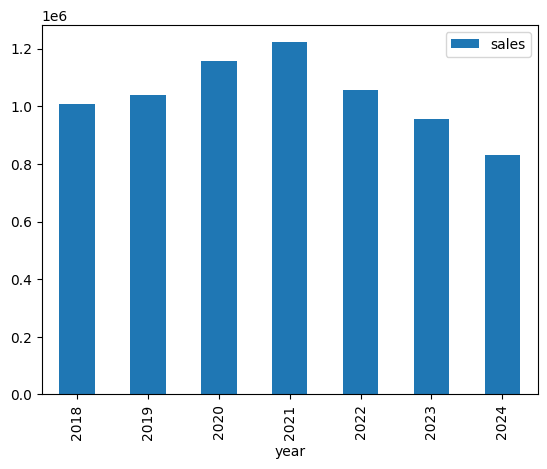

In [51]:
table.plot(kind='bar')

This is not a good way to calculate mean by year because there are 331 sales dates in 2018, and 30 dates in 2024.

## Part 2 Split sales data by quarters.

In [52]:
def quarter(date):
    for _, row in d2.iterrows():
        if date <= row['end_date']:
            return row['period']
        
d1['quarter'] = d1['date'].apply(quarter)
d1

,date,sales,year,quarter
0,2018-02-04,927344.59,2018,1QFY-2019
1,2018-02-05,963091.64,2018,1QFY-2019
2,2018-02-06,862046.64,2018,1QFY-2019
3,2018-02-07,772632.77,2018,1QFY-2019
4,2018-02-08,1011371.25,2018,1QFY-2019
...,...,...,...,...
2182,2024-01-26,736678.70,2024,4QFY-2024
2183,2024-01-27,713985.39,2024,4QFY-2024
2184,2024-01-28,638627.04,2024,4QFY-2024
2185,2024-01-29,696591.99,2024,4QFY-2024


In [53]:
def quarter_date(date):
    for _, row in d2.iterrows():
        if date <= row['end_date']:
            return row['end_date']
        
d1['quarter_Date'] = d1['date'].apply(quarter_date)
d1

,date,sales,year,quarter,quarter_Date
0,2018-02-04,927344.59,2018,1QFY-2019,2018-05-05
1,2018-02-05,963091.64,2018,1QFY-2019,2018-05-05
2,2018-02-06,862046.64,2018,1QFY-2019,2018-05-05
3,2018-02-07,772632.77,2018,1QFY-2019,2018-05-05
4,2018-02-08,1011371.25,2018,1QFY-2019,2018-05-05
...,...,...,...,...,...
2182,2024-01-26,736678.70,2024,4QFY-2024,2024-02-03
2183,2024-01-27,713985.39,2024,4QFY-2024,2024-02-03
2184,2024-01-28,638627.04,2024,4QFY-2024,2024-02-03
2185,2024-01-29,696591.99,2024,4QFY-2024,2024-02-03


## Part 3 Forcast quarter sales.

In [54]:
d1.drop('year', axis=1, inplace=True)
df_quarterly = d1.groupby('quarter').sum()
df_quarterly

C:\Users\Steven\AppData\Local\Temp\ipykernel_1296\2290018065.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarterly = d1.groupby('quarter').sum()


,sales
quarter,
1QFY-2019,8.976587e+07
1QFY-2020,9.479855e+07
1QFY-2021,1.018179e+08
1QFY-2022,1.167907e+08
1QFY-2023,9.967639e+07
1QFY-2024,8.745210e+07
2QFY-2019,8.126356e+07
2QFY-2020,8.526102e+07
2QFY-2021,9.456388e+07


In [55]:
# def convert_quarter_to_datetime(quarter_str):
#     q, year = quarter_str.split('QFY-')
#     q, year = int(q), int(year)
#     month = (q - 1) * 3 + 1
#     return pd.Timestamp(year=year, month=month, day=1)

# df_quarterly.index = pd.to_datetime(df_quarterly.index.map(convert_quarter_to_datetime))
# df_quarterly = df_quarterly.sort_index()

In [56]:
df_quarterly = d1[['quarter_Date', 'sales']].set_index('quarter_Date')
df_quarterly = df_quarterly.groupby('quarter_Date').sum()
df_quarterly.index = pd.to_datetime(df_quarterly.index)
df_quarterly = df_quarterly.sort_index()
df_quarterly

,sales
quarter_Date,
2018-05-05,8.976587e+07
2018-08-04,8.126356e+07
2018-11-03,8.162976e+07
2019-02-02,1.114224e+08
2019-05-04,9.479855e+07
2019-08-03,8.526102e+07
2019-11-02,8.401130e+07
2020-02-01,1.157838e+08
2020-05-02,1.018179e+08


**Method 1 ARIMA**

In [57]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_quarterly['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.8023948212585617
p-value: 0.05793249833585577


The null hypothesis of the ADF test is that the time series is non-stationary. Therefore, if the p-value is less than a chosen significance level (commonly 0.05), then we reject the null hypothesis and conclude that the time series is stationary. Here, the p-value is 0.05793249833585577. We should not reject null hypothesis. So we can try to detrend the data.

In [58]:
df_quarterly_diff = df_quarterly.diff(periods=1)  # First-order differencing

result_diff = adfuller(df_quarterly_diff['sales'].dropna())
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])

ADF Statistic after differencing: -1.6564242058222787
p-value after differencing: 0.45369220231758045


The detrending is not better but worse. Since the original data have already got p-value which is almost close to 0.05, we can use the original data to build the model first.

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

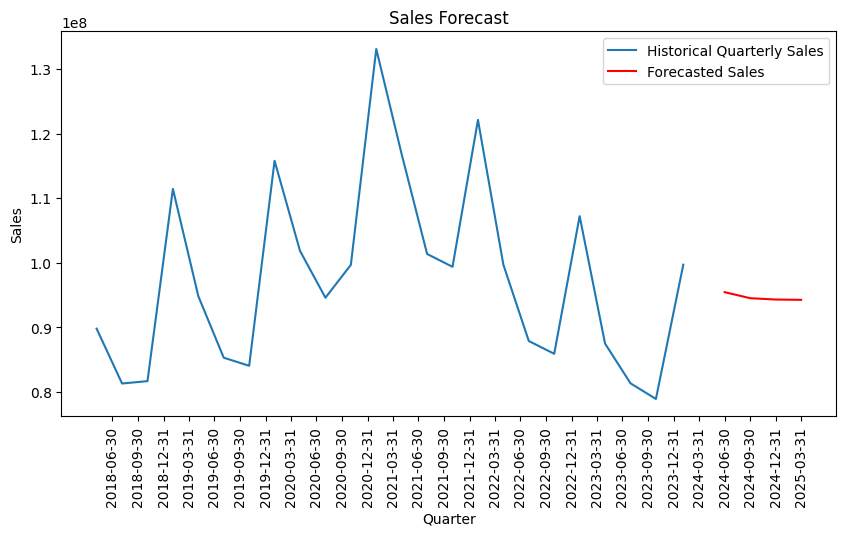

In [59]:
from statsmodels.tsa.arima.model import ARIMA

df_quarterly.index = pd.to_datetime(df_quarterly.index)

df_quarterly.index = df_quarterly.index.tz_localize(None)

model = ARIMA(df_quarterly, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=4) # next 4 quarters

plt.figure(figsize=(10, 5))
plt.plot(df_quarterly.index, df_quarterly['sales'], label='Historical Quarterly Sales')  
forecast_index = pd.date_range(start=df_quarterly.index[-1], periods=5, freq='Q')[1:]  # Generate future dates for forecast
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(ticks=pd.date_range(start=df_quarterly.index.min(), periods=len(df_quarterly.index) + 4, freq='Q'), rotation=90)  
plt.legend()
plt.show()

**Method 2 SARIMA**

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start

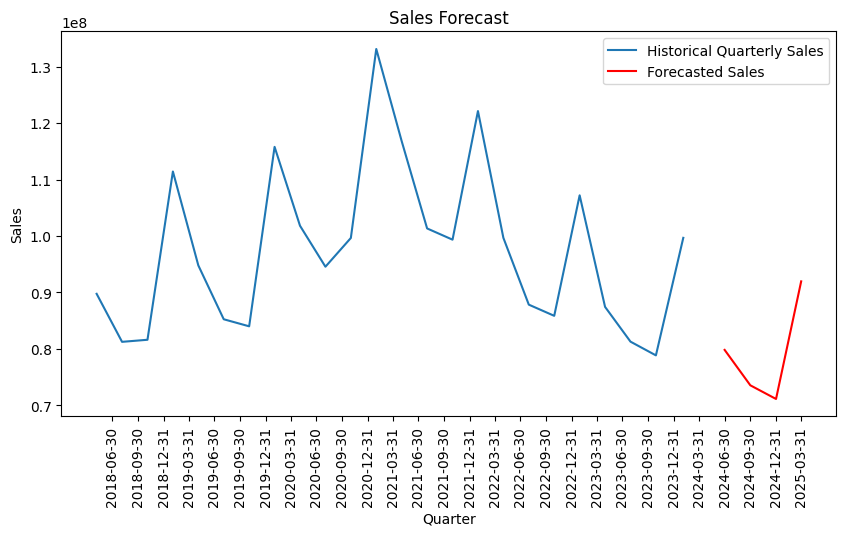

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 4)  # Seasonal order (P, D, Q, S)
model = SARIMAX(df_quarterly, order=order, seasonal_order=seasonal_order)

model_fit = model.fit()

forecast = model_fit.forecast(steps=4)

plt.figure(figsize=(10, 5))
plt.plot(df_quarterly.index, df_quarterly['sales'], label='Historical Quarterly Sales')  
forecast_index = pd.date_range(start=df_quarterly.index[-1], periods=5, freq='Q')[1:]
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(ticks=pd.date_range(start=df_quarterly.index.min(), periods=len(df_quarterly.index) + 4, freq='Q'), rotation=90)  
plt.legend()
plt.show()

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   24
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -318.035
Date:                           Sat, 27 Apr 2024   AIC                            646.071
Time:                                   10:20:59   BIC                            650.793
Sample:                                        0   HQIC                           646.870
                                            - 24                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2942      2.299      0.128      0.898      -4.211       4.800
ma.L1         -0.2588      2.302     -0.112

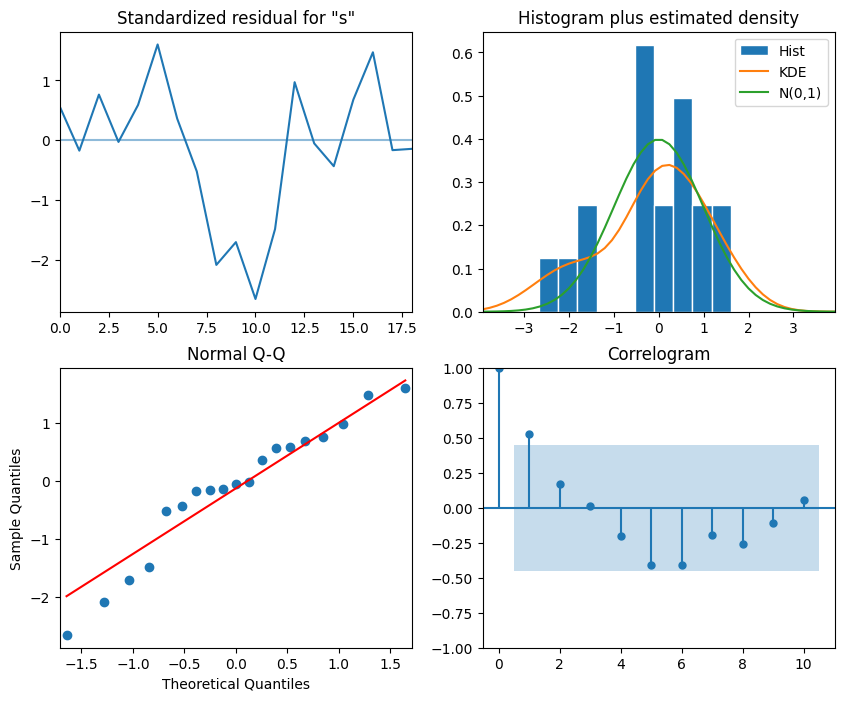

In [61]:
print(model_fit.summary())

model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

The non-seasonal orders are (1, 1, 1), and the seasonal orders are (1, 1, 1, 4), indicating one autoregressive term, one differencing term, one moving average term for the non-seasonal component, and one autoregressive, one differencing, one moving average term for the seasonal component with a seasonal period of 4 quarters.

Based on the provided results, the SARIMA model may not exhibit optimal performance, as indicated by the lack of significant coefficients and significant autocorrelation in the residuals. 

**Method 3 Prophet**

In [62]:
# from prophet import Prophet

# df_prophet = df_quarterly.rename(columns={'sales': 'y'})
# df_prophet.index.name = 'ds' 

# df_prophet_reset = df_prophet.reset_index()

# df_prophet_reset = df_prophet_reset.rename(columns={'quarter_Date': 'ds', 'sales': 'y'})

# df_prophet_reset['ds'] = pd.to_datetime(df_prophet_reset['ds'])

# model = Prophet()
# model.fit(df_prophet_reset)

# future_dates = model.make_future_dataframe(periods=4, freq='Q')

# forecast = model.predict(future_dates)

# fig = model.plot(forecast)
# plt.title('Sales Forecast Using Prophet')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.xticks(rotation=90)
# plt.show()

# fig2 = model.plot_components(forecast)


C:\Users\Steven\AppData\Local\Temp\ipykernel_1296\4098156320.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarterly = d1.groupby('quarter').sum()
10:21:00 - cmdstanpy - INFO - Chain [1] start processing
10:21:00 - cmdstanpy - INFO - Chain [1] done processing


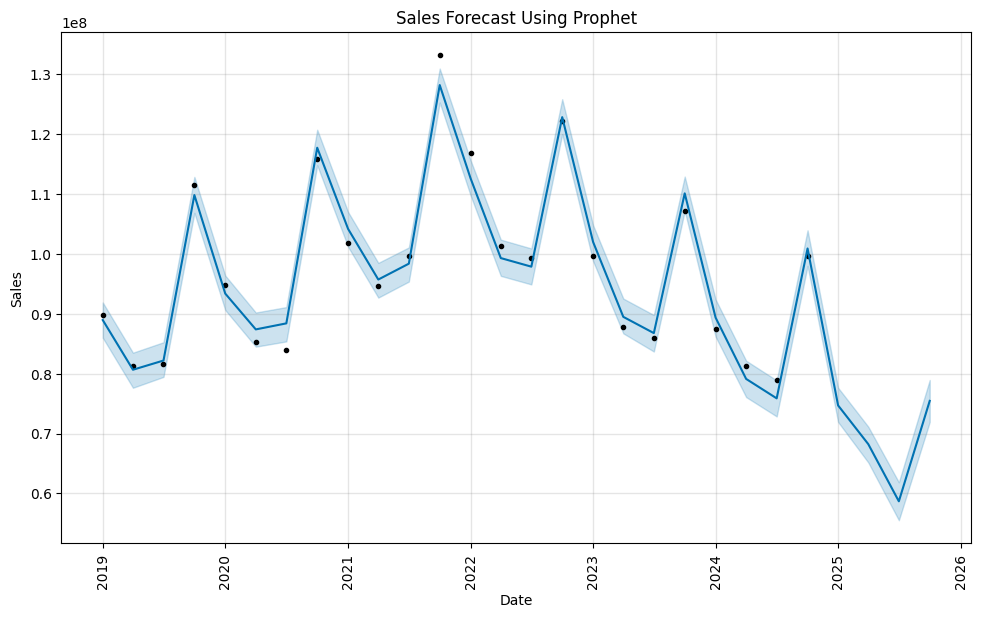

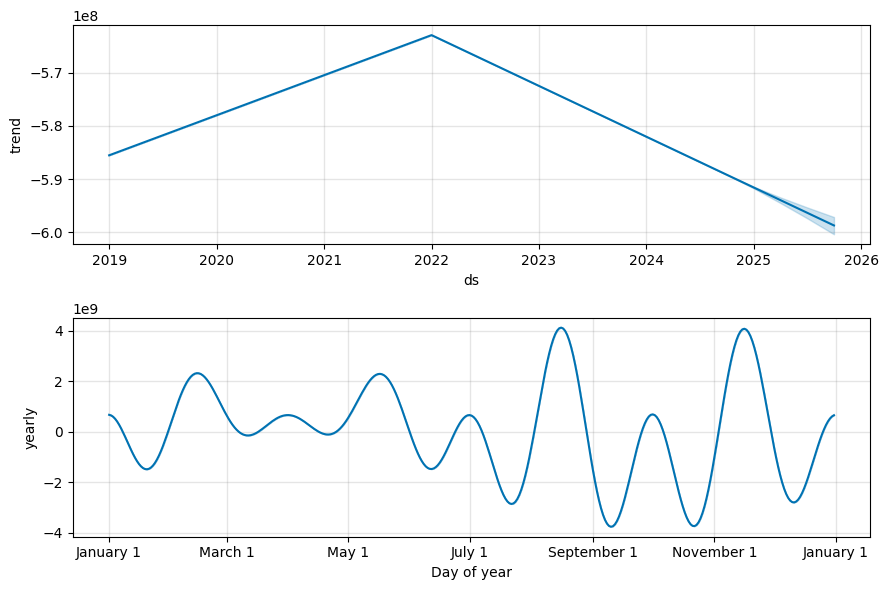

In [63]:
from prophet import Prophet

df_quarterly = d1.groupby('quarter').sum()
df_quarterly

def convert_quarter_to_datetime(quarter_str):
    q, year = quarter_str.split('QFY-')
    q, year = int(q), int(year)
    month = (q - 1) * 3 + 1
    return pd.Timestamp(year=year, month=month, day=1)

df_quarterly.index = pd.to_datetime(df_quarterly.index.map(convert_quarter_to_datetime))
df_quarterly = df_quarterly.sort_index()

df_quarterly_reset = df_quarterly.reset_index()

df_prophet = df_quarterly_reset.rename(columns={'quarter': 'ds', 'sales': 'y'})

model = Prophet()
model.fit(df_prophet)

future_dates = model.make_future_dataframe(periods=4, freq='Q')  # next 4 quarters

forecast = model.predict(future_dates)
fig = model.plot(forecast)
plt.title('Sales Forecast Using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

fig2 = model.plot_components(forecast)

Trend: This plot shows the overall trend in the data, which represents the long-term behavior or direction of the time series.  
Seasonality: This plot displays the periodic fluctuations or patterns in the data that occur at fixed intervals (e.g., daily, weekly, monthly).  

**Method 4 XGBoost**

In [64]:
def create_features(data, lag_count):
    df = pd.DataFrame(data)
    for i in range(1, lag_count + 1):
        df[f'lag_{i}'] = df[df.columns[0]].shift(i)
    df['rolling_mean'] = df[df.columns[0]].rolling(window=3).mean()
    df.dropna(inplace=True)
    return df

Forecast for Q1: 99677220.0
Forecast for Q2: 92396400.0
Forecast for Q3: 83823690.0
Forecast for Q4: 83630270.0


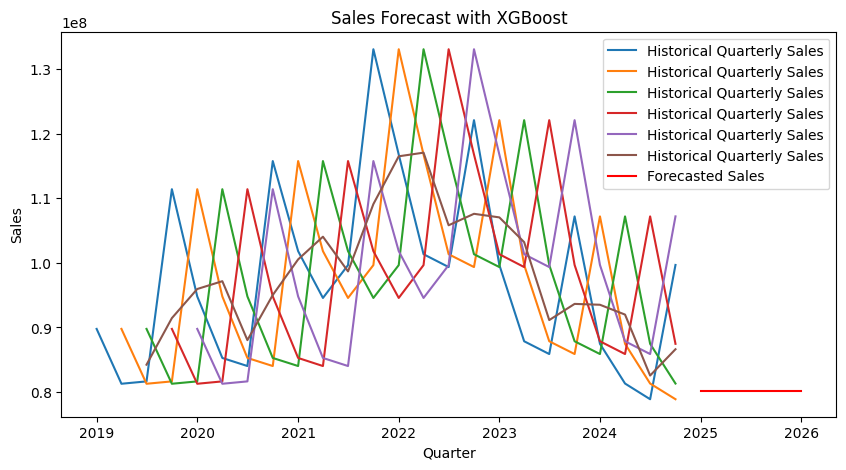

In [65]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

def create_features(data, lag_count):
    df = pd.DataFrame(data)
    for i in range(1, lag_count + 1):
        df[f'lag_{i}'] = df[df.columns[0]].shift(i)
    df['rolling_mean'] = df[df.columns[0]].rolling(window=3).mean()
    df.dropna(inplace=True)
    return df

features = create_features(df_quarterly, 4)  # Creating lag of 4 quarters and rolling mean

X = features.drop(df_quarterly.columns[0], axis=1)
y = features[df_quarterly.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror')
model.fit(X_train, y_train)

X_last = features.iloc[-1, 1:].to_frame().T  # use the last row to predict the next quarter
for i in range(1, 5):
    y_pred = model.predict(X_last)
    print(f"Forecast for Q{i}:", y_pred[0])
    X_last = np.roll(X_last, -1)
    X_last[0, -1] = y_pred[0]

plt.figure(figsize=(10, 5))
plt.plot(df_quarterly.index, df_quarterly, label='Historical Quarterly Sales')
plt.plot(pd.date_range(start=df_quarterly.index[-1], periods=5, freq='Q'), [model.predict(X_last)[0] for _ in range(5)], label='Forecasted Sales', color='red')
plt.title('Sales Forecast with XGBoost')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.show()


**Method 5 LSTM**

In [66]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [67]:
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return torch.stack(xs).unsqueeze(2), torch.stack(ys)

In [68]:
df_quarterly['ds'] = pd.to_datetime(df_quarterly.index)
df_quarterly.sort_values('ds', inplace=True)

scaler = MinMaxScaler(feature_range=(-1, 1))  # Normalize the sales data
df_quarterly['sales'] = scaler.fit_transform(df_quarterly['sales'].values.reshape(-1, 1))

data = torch.FloatTensor(df_quarterly['sales'].values).view(-1)

seq_length = 4  # Using the last four quarters to predict the next quarter
X, y = create_sequences(data, seq_length)

train_size = int(len(X) * 0.67)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 2000

for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
    
    if i%25 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

C:\Users\Steven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss: 0.025432080030441284
Epoch 25 Loss: 0.31851691007614136
Epoch 50 Loss: 0.19181540608406067
Epoch 75 Loss: 0.10297653824090958
Epoch 100 Loss: 0.11504250019788742
Epoch 125 Loss: 0.019439158961176872
Epoch 150 Loss: 0.026533307507634163
Epoch 175 Loss: 0.0065409839153289795
Epoch 200 Loss: 0.010797712020576
Epoch 225 Loss: 0.0033664824441075325
Epoch 250 Loss: 0.008163788355886936
Epoch 275 Loss: 0.003950017504394054
Epoch 300 Loss: 0.006991636008024216
Epoch 325 Loss: 0.004124286584556103
Epoch 350 Loss: 0.005736041348427534
Epoch 375 Loss: 0.003812642302364111
Epoch 400 Loss: 0.004907530732452869
Epoch 425 Loss: 0.003438167739659548
Epoch 450 Loss: 0.004280864726752043
Epoch 475 Loss: 0.0030840057879686356
Epoch 500 Loss: 0.0037642635870724916
Epoch 525 Loss: 0.0027600012253969908
Epoch 550 Loss: 0.0033164802007377148
Epoch 575 Loss: 0.0024764861445873976
Epoch 600 Loss: 0.002934829331934452
Epoch 625 Loss: 0.002236487576738
Epoch 650 Loss: 0.0026118892710655928
Epoch 67

-0.37962913513183594
-0.7252198457717896
-0.7701791524887085
0.3687492609024048
-0.12647877633571625
-0.3873545527458191
-0.19932647049427032
0.9938967823982239
0.39882606267929077
-0.17723527550697327
-0.26061153411865234
0.5781403183937073
-0.24819310009479523
0.06630494445562363
0.851301372051239
1.4040569067001343
-0.1960524320602417
-0.834545910358429
-0.9051401615142822
-0.038091227412223816


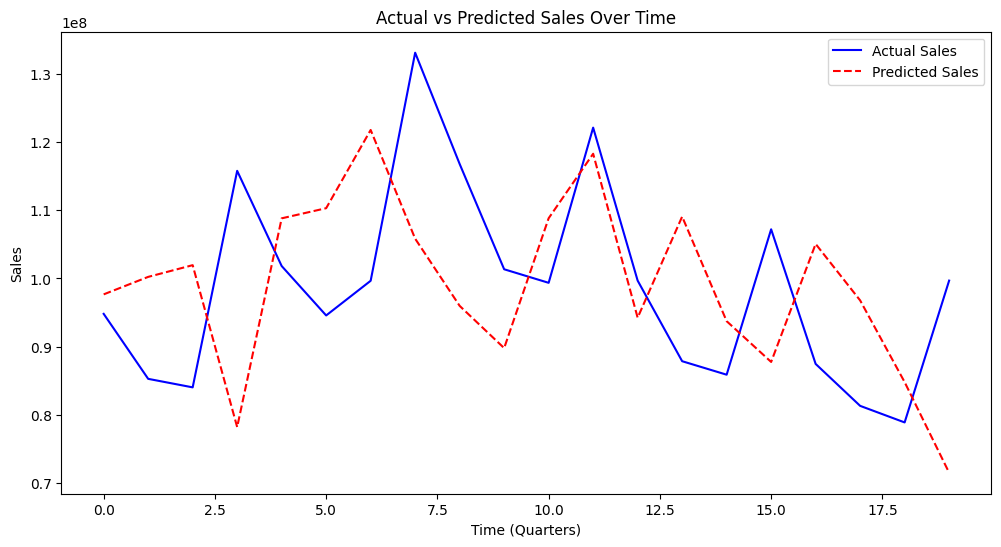

In [69]:
def predict(model, X):
    predictions = []
    model.eval()
    with torch.no_grad():
        for seq in X:
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                                 torch.zeros(1, 1, model.hidden_layer_size))
            print(model(seq).item())
            predictions.append(model(seq).item())
            # print(predictions)
    return predictions

train_predictions = predict(model, X_train)
test_predictions = predict(model, X_test)

actuals_train = y_train.flatten().detach().numpy()  # Flatten and inverse transform the actual values
actuals_test = y_test.flatten().detach().numpy()

actuals_train_rescaled = scaler.inverse_transform(actuals_train.reshape(-1, 1)).flatten()  # Inverse transform predictions and actuals
actuals_test_rescaled = scaler.inverse_transform(actuals_test.reshape(-1, 1)).flatten()
train_predictions_rescaled = scaler.inverse_transform(np.array(train_predictions).reshape(-1, 1)).flatten()
test_predictions_rescaled = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1)).flatten()

all_actuals = np.concatenate([actuals_train_rescaled, actuals_test_rescaled])
all_predictions = np.concatenate([train_predictions_rescaled, test_predictions_rescaled])

plt.figure(figsize=(12, 6))
plt.plot(all_actuals, label='Actual Sales', color='blue')
plt.plot(all_predictions, label='Predicted Sales', color='red', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Time (Quarters)')
plt.ylabel('Sales')
plt.legend()
plt.show()

**Sales Forecasting Methodology Summary:**



ARIMA (AutoRegressive Integrated Moving Average):
ARIMA is best suited for univariate time series data with linear and stationary patterns. It relies on past observations and their lagged values to make predictions, making it effective for capturing short-term dependencies and trends. ARIMA models offer interpretability and are grounded in statistical theory, making them suitable for scenarios where understanding the underlying mechanisms is important. However, ARIMA may struggle with non-linear and complex relationships in the data and might require manual tuning of parameters. So in the aboe visulization, we see the prediction is generally a linear trend without much details.

SARIMA (Seasonal AutoRegressive Integrated Moving Average):
SARIMA extends the ARIMA model to incorporate seasonality in the data. It's particularly useful for time series data that exhibit repeating patterns over fixed intervals, such as daily, weekly, or yearly seasons. SARIMA models account for both the autoregressive and moving average components along with seasonal effects, allowing for more accurate forecasts of seasonal data. Like ARIMA, SARIMA requires the data to be stationary, but it also handles seasonality, making it suitable for a broader range of time series datasets. However, SARIMA models may become complex with multiple seasonal components and require careful selection of parameters, which can sometimes be challenging without domain knowledge or automated tuning techniques.

Prophet:
Prophet, developed by Facebook, is designed for forecasting time series data with daily, weekly, and yearly seasonality. It handles missing data and outliers well and provides excellent out-of-the-box performance, making it user-friendly for non-specialists. Prophet's strength lies in its ability to capture seasonality and trend changes automatically, without the need for manual parameter tuning. However, it may not be as effective for capturing long-term dependencies and non-linear relationships compared to other methods like LSTM. So we see the graph give a predition almost perfectly in the same stlye as previous data.

XGBoost (Extreme Gradient Boosting):
XGBoost is a gradient boosting framework that excels in scenarios where data exhibits complex interactions between variables and non-temporal patterns. It is particularly effective when the relationship between predictors and the target variable is non-linear and can handle a wide range of data types. However, XGBoost does not inherently capture temporal dependencies in sequential data like time series, and it may require feature engineering to incorporate time-related features effectively. So this version of XGBoost without much fine-tuning did not give much information.

LSTM (Long Short-Term Memory):
LSTM networks are well-suited for capturing complex, non-linear relationships in sequential data with long-term dependencies. They excel in time series forecasting tasks where there are multiple input variables and the relationships between variables are not easily captured by traditional methods. LSTMs can learn from past observations and remember information over long sequences, making them suitable for forecasting tasks with intricate temporal patterns. However, LSTMs may require more computational resources and data preprocessing compared to simpler methods like ARIMA or Prophet. The result shows that LSTM trend prediction is also relatively good.



Comparison:
1. Data Characteristics:
   - ARIMA: Best suited for univariate time series data with linear and stationary patterns.
   - SARIMA: Ideal for time series data with seasonal patterns, incorporating both autoregressive and moving average components along with seasonal effects.
   - Prophet: Handles daily, weekly, and yearly seasonality well, and can handle missing data and outliers.
   - XGBoost: Effective for scenarios with complex interactions between variables and non-temporal patterns.
   - LSTM: Well-suited for capturing complex, non-linear relationships in sequential data with long-term dependencies.

2. Model Complexity:
   - ARIMA: Relatively simple model with fewer parameters, but may require manual tuning.
   - SARIMA: Similar to ARIMA but extends to incorporate seasonality, potentially increasing complexity, especially with multiple seasonal components.
   - Prophet: Offers an intuitive and user-friendly interface with automatic handling of seasonality and trend changes.
   - XGBoost: Can handle complex interactions between variables, but may require careful tuning of hyperparameters.
   - LSTM: More complex neural network architecture, capable of capturing intricate temporal patterns, but requires more computational resources and data preprocessing.

3. Interpretability:
   - ARIMA: Provides straightforward interpretations of coefficients and statistical significance.
   - SARIMA: Interpretability is similar to ARIMA, providing insights into the effects of autoregressive, moving average, and seasonal components.
   - Prophet: Offers intuitive diagnostics and visualizations, making it accessible to users with varying levels of statistical expertise.
   - XGBoost: May lack interpretability due to the complex interactions between variables.
   - LSTM: Interpretability can be challenging due to the black-box nature of neural networks, although techniques like feature importance analysis can provide some insights.

4. Performance:
   - ARIMA: Performs well for linear and stationary time series data with short-term dependencies.
   - SARIMA: Well-performing for time series data with seasonal patterns, capturing both short-term and seasonal dependencies.
   - Prophet: Provides good performance for data with daily, weekly, and yearly seasonality and handles missing data and outliers well.
   - XGBoost: Highly effective for scenarios with non-linear relationships and complex interactions between variables.
   - LSTM: Excels in capturing complex, non-linear relationships and long-term dependencies in sequential data, but may require more data and computational resources.

5. Computational Efficiency:
   - ARIMA: Generally computationally efficient, especially for smaller datasets.
   - SARIMA: Similar computational efficiency to ARIMA, but may require additional computational resources for models with multiple seasonal components.
   - Prophet: Efficient for medium-sized datasets, with automatic handling of seasonality and trend changes.
   - XGBoost: Can be computationally intensive, especially for large datasets with many features.
   - LSTM: More computationally intensive, particularly for training on large sequential datasets, and may require GPU acceleration for faster training.


Overall, the predicted sales in the next few quarters would be dropped compared with previous ones, to around 6 ~ 8e+07.